## Problem 6.12


0.315


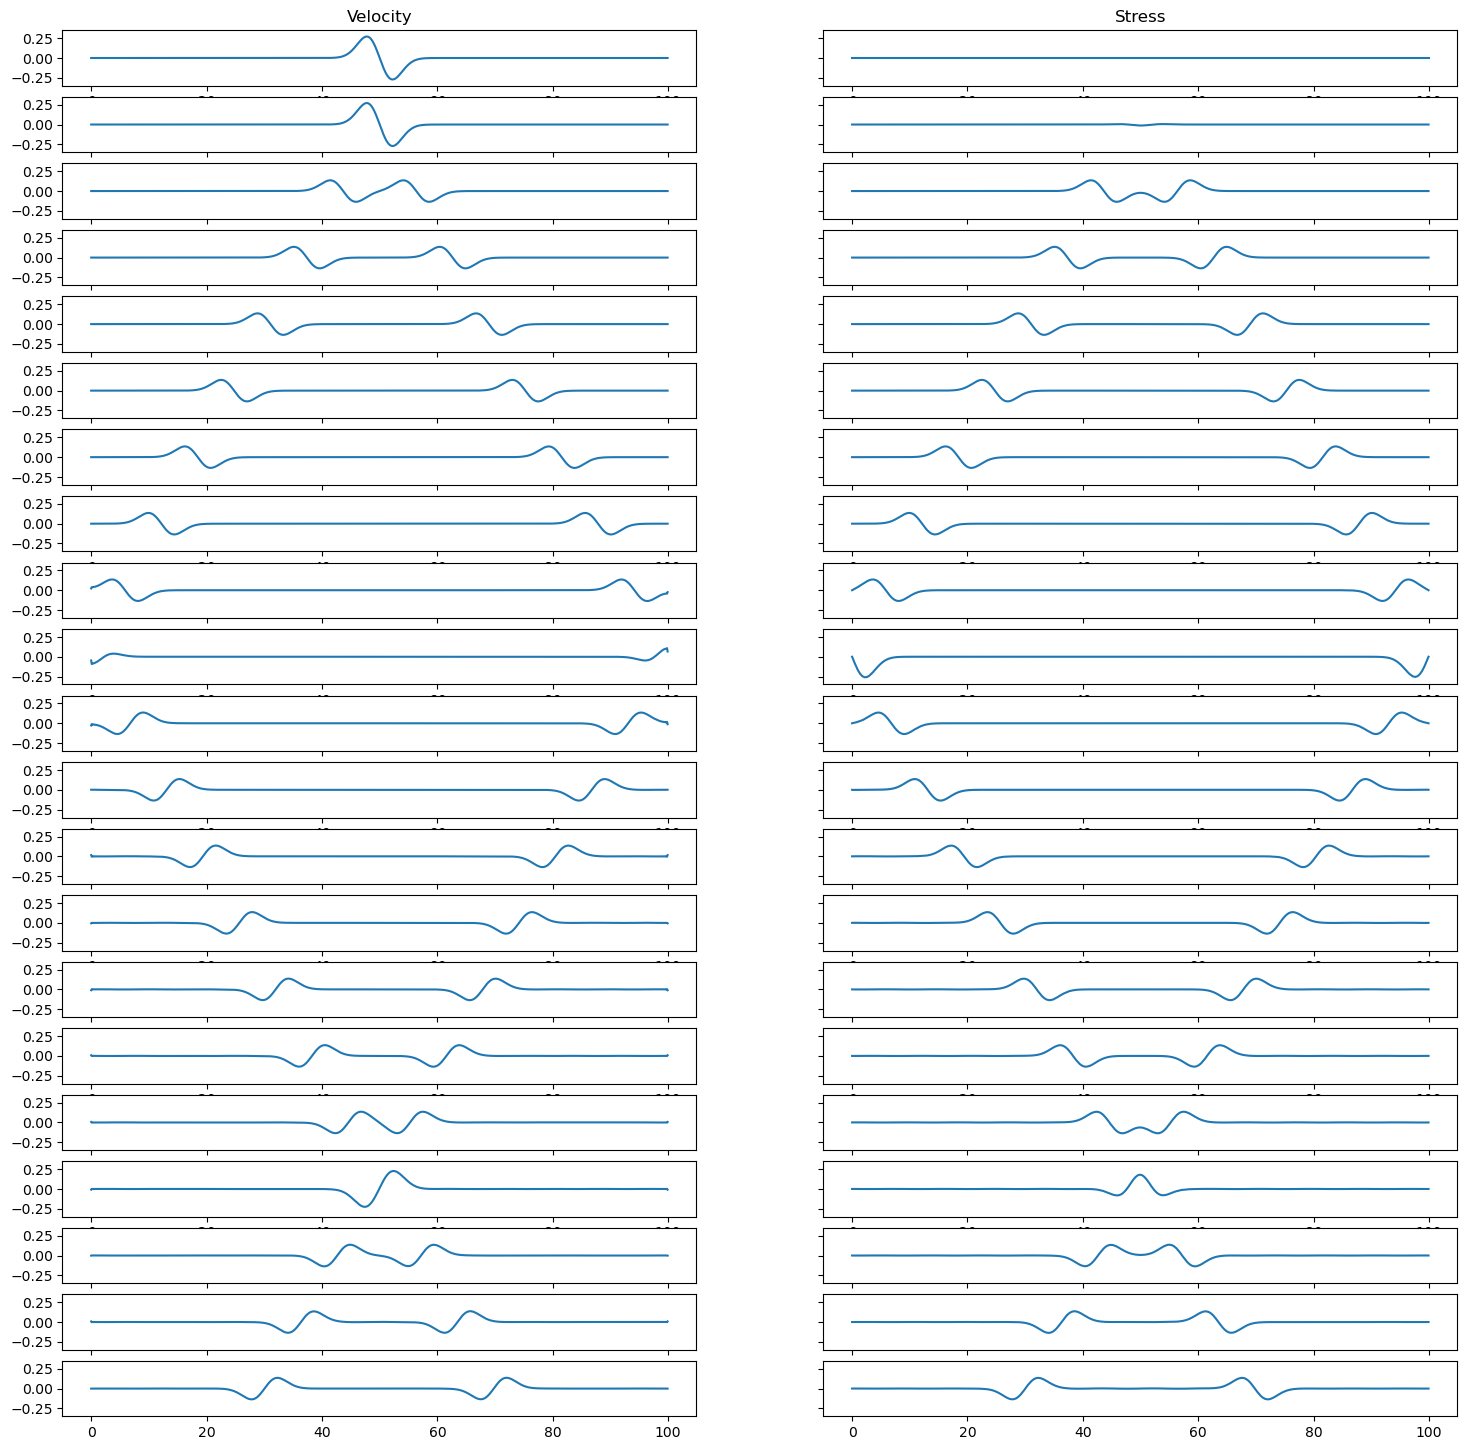

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy


def init_condition(x, v, sigma):
    sigma[:] = 0
    v = -0.2*(x-50) * np.exp(-0.1 * (x-50)**2)
    return v, sigma


nsteps = 4000
L      = 100
dx     = 0.10
dt     = 0.0315
dirichlet_bc = False

# Here x goes from 0 (j=0) to 99.9 (j=N-1)
# and therefore has length of N
x =  np.arange(0, L, dx)
N = len(x)


# Initialise some arrays: 
s = np.zeros(N, dtype='complex')
v = np.zeros(N, dtype='complex')

sgrad = np.zeros(N, dtype='complex')
vgrad = np.zeros(N, dtype='complex')

sold = np.zeros(N, dtype='complex')
vold = np.zeros(N, dtype='complex')

snew = np.zeros(N, dtype='complex')
vnew = np.zeros(N, dtype='complex')


rho = np.zeros(N) + 1
mu  = np.zeros(N) + 1


# Compute maximum CFL value
cfl =  dt*((mu/rho)**0.5)/dx
print(np.max(cfl))


nplots  = 20
fig, ax = plt.subplots(nplots+1, 2, figsize=(18, 18),sharey=True)

v, s       = init_condition(x, v, s)
vold, sold = init_condition(x, vold, sold)

ax[0,0].plot(x, v)
ax[0,1].plot(x, s)

ax[0,0].set_ylim([-0.35, 0.35])
ax[0,0].set_title('Velocity')
ax[0,1].set_title('Stress')


kfft = np.fft.fftfreq(N, d=dx) * 2 * np.pi

iax    = 1
for istep in range(nsteps):

    vk = np.fft.fft(v)
    vgrad = np.fft.ifft(1j * kfft * vk)

    sk    = np.fft.fft(s)
    sgrad = np.fft.ifft(1j * kfft * sk)

    #vgradanal = np.exp(-0.1* (x-50)**2 ) * (0.04*(x-50)**2 - 0.2)
    #ax[2,0].plot(x, vgradanal)
    #ax[2,0].plot(x, vgrad)
    
    vnew = vold + sgrad*(2 * dt / rho)
    snew = sold + vgrad*(2 * dt * mu)

    
    # Dirichlet
    if dirichlet_bc: 
        v[0]     = 0
        v[-1]    = 0
        vnew[0]  = 0
        vnew[-1] = 0
    else: 
        s[0]     = 0
        s[-1]    = 0
        snew[0]  = 0
        snew[-1] = 0
    
    # Update arrays: 
    vold[:] = v[:]
    sold[:] = s[:]
    v[:]    = vnew[:].real
    s[:]    = snew[:].real


    if istep % (nsteps/nplots) == 0:
        ax[iax,0].plot(x, v.real)
        ax[iax,1].plot(x, s.real)

        iax +=1


## Heterogeneous model: 



/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


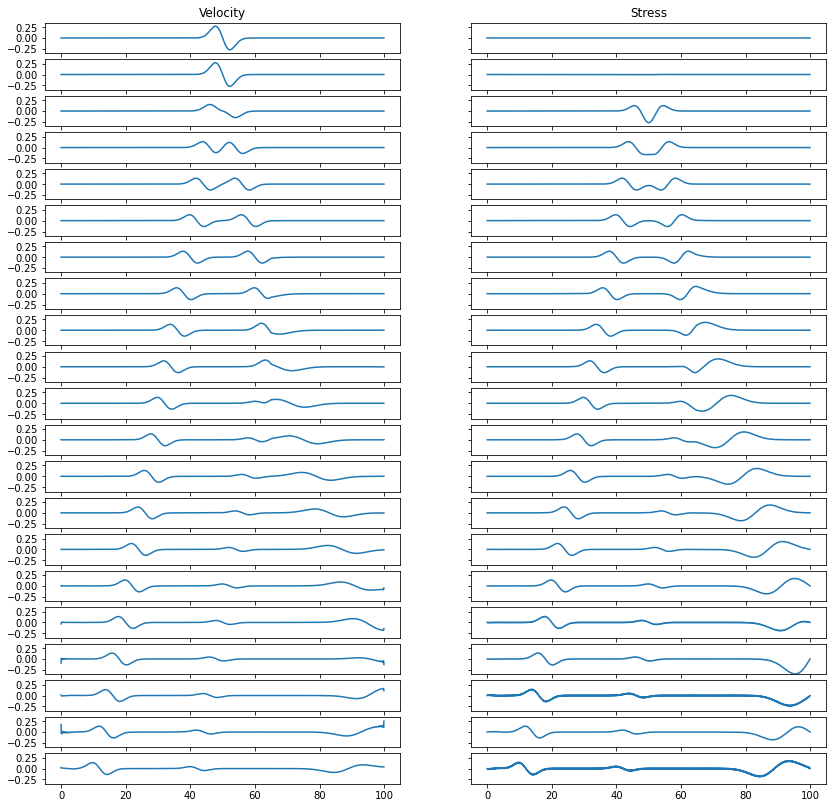

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy


def init_condition(x, v, sigma):
    sigma[:] = 0
    v = -0.2*(x-50) * np.exp(-0.1 * (x-50)**2)
    return v, sigma


nsteps = 5000
L      = 100
dx     = 0.10
dt     = 0.008

# Here x goes from 0 (j=0) to 99.9 (j=N-1)
# and therefore has length of N
x =  np.arange(0, L, dx)

N = len(x)


dirichlet_bc = False

s = np.zeros(N, dtype='complex')
v = np.zeros(N, dtype='complex')

sgrad = np.zeros(N, dtype='complex')
vgrad = np.zeros(N, dtype='complex')

sold = np.zeros(N, dtype='complex')
vold = np.zeros(N, dtype='complex')

snew = np.zeros(N, dtype='complex')
vnew = np.zeros(N, dtype='complex')

vk = np.zeros(N, dtype='complex')
sk = np.zeros(N, dtype='complex')


rho = np.zeros(N) + 1
mu  = np.zeros(N) + 1

mu[x>65]= 4


cfl =  dt*((mu/rho)**0.5)/dx

nplots = 20
fig, ax = plt.subplots(nplots+1, 2, figsize=(14, 14),sharey=True)

v, s       = init_condition(x, v, s)
vold, sold = init_condition(x, vold, sold)

ax[0,0].plot(x, v)
ax[0,1].plot(x, s)
ax[0,0].set_title('Velocity')
ax[0,1].set_title('Stress')
ax[0,0].set_ylim([-0.35, 0.35])


kfft = np.fft.fftfreq(N, d=dx) * 2 * np.pi

iax    = 1
for istep in range(nsteps):

    vk = np.fft.fft(v)
    vgrad = np.fft.ifft(1j * kfft * vk)

    sk    = np.fft.fft(s)
    sgrad = np.fft.ifft(1j * kfft * sk)
    
    vnew = vold + ((2 * dt / rho)*sgrad)
    snew = sold + ((2 * dt * mu)*vgrad)
    
    # Dirichlet
    if dirichlet_bc: 
        v[0]     = 0
        v[-1]    = 0
        vnew[0]  = 0
        vnew[-1] = 0
    else: 
        s[0]     = 0
        s[-1]    = 0
        snew[0]  = 0
        snew[-1] = 0
    
    # Update arrays: 
    vold[:] = v[:]
    sold[:] = s[:]
    v[:]    = vnew[:].real
    s[:]    = snew[:].real

    
    # Plot every nth timestep 
    if istep % (nsteps/nplots) == 0:
        ax[iax,0].plot(x, v.real)
        ax[iax,1].plot(x, s.real)
        iax +=1